## **TALLER 3: Santiago Uribe - Sebastián Otálora**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
import cvxpy as cp
from scipy.stats import norm
!pip install --quiet pyDOE
import statsmodels.api as sm
from pyDOE import lhs
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


**1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual
y con cierre a Dic-2022:** 

**Los activos seleccionados son:**
1.   American Express ("AXP")
2.   Chevron ("CVX")
3.   Disney ("DIS")
4.   Goldman Sachs ("GS")
5.   Walgreens Boots Alliance ("WBA")   



In [111]:
activos=["AXP","CVX","DIS","GS","WBA"]
precios = yf.download(activos,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos=np.log(precios/precios.shift()).dropna()
precios_indice = yf.download("^DJI",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_indice=np.log(precios_indice/precios_indice.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


**a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un
DataFrame donde se resuman los caculos de: retornos esperados (promedio),
volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada
uno.**

In [112]:
#American Express
X_AXP=pd.concat([retornos_indice],axis=1)
Y_AXP =retornos["AXP"]
X_AXP = sm.add_constant(X_AXP)
model_AXP = sm.OLS(Y_AXP, X_AXP).fit()
print(model_AXP.summary())

                            OLS Regression Results                            
Dep. Variable:                    AXP   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     97.35
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.10e-14
Time:                        02:10:23   Log-Likelihood:                 93.346
No. Observations:                  60   AIC:                            -182.7
Df Residuals:                      58   BIC:                            -178.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.007      0.256      0.7

In [113]:
retornos["AXP"].mean()

0.00780767069576815

In [114]:
model_AXP.params

const        0.001723
Adj Close    1.244391
dtype: float64

In [115]:
retornos["AXP"].mean()*model_AXP.params[[1]]

Adj Close    0.009716
dtype: float64

In [116]:
#Chevron
X_CVX=pd.concat([retornos_indice],axis=1)
Y_CVX=retornos["CVX"]
X_CVX = sm.add_constant(X_CVX)
model_CVX = sm.OLS(Y_CVX, X_CVX).fit()
print(model_CVX.summary())

                            OLS Regression Results                            
Dep. Variable:                    CVX   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     60.08
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.60e-10
Time:                        02:10:29   Log-Likelihood:                 79.443
No. Observations:                  60   AIC:                            -154.9
Df Residuals:                      58   BIC:                            -150.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.008      0.428      0.6

In [117]:
retornos["CVX"].mean()

0.009659289661175192

In [118]:
model_CVX.params

const        0.003633
Adj Close    1.232513
dtype: float64

In [119]:
retornos["CVX"].mean()*model_AXP.params[[1]]

Adj Close    0.01202
dtype: float64

In [120]:
#Disney
X_DIS=pd.concat([retornos_indice],axis=1)
Y_DIS =retornos["DIS"]
X_DIS = sm.add_constant(X_DIS)
model_DIS = sm.OLS(Y_DIS, X_DIS).fit()
print(model_DIS.summary())

                            OLS Regression Results                            
Dep. Variable:                    DIS   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     60.99
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.28e-10
Time:                        02:10:35   Log-Likelihood:                 79.625
No. Observations:                  60   AIC:                            -155.3
Df Residuals:                      58   BIC:                            -151.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0090      0.008     -1.064      0.2

In [121]:
retornos["DIS"].mean()

-0.0029527281775719168

In [122]:
model_DIS.params

const       -0.009006
Adj Close    1.238032
dtype: float64

In [123]:
retornos["DIS"].mean()*model_AXP.params[[1]]

Adj Close   -0.003674
dtype: float64

In [124]:
#Goldman Sachs
X_GS=pd.concat([retornos_indice],axis=1)
Y_GS =retornos["GS"]
X_GS = sm.add_constant(X_GS)
model_GS = sm.OLS(Y_GS, X_GS).fit()
print(model_GS.summary())

                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.95e-16
Time:                        02:10:39   Log-Likelihood:                 93.013
No. Observations:                  60   AIC:                            -182.0
Df Residuals:                      58   BIC:                            -177.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.007     -0.049      0.9

In [125]:
retornos["GS"].mean()

0.0066640921698657984

In [126]:
model_GS.params

const       -0.000332
Adj Close    1.430769
dtype: float64

In [127]:
retornos["GS"].mean()*model_AXP.params[[1]]

Adj Close    0.008293
dtype: float64

In [128]:
#Walgreens Boots Alliance
X_WBA=pd.concat([retornos_indice],axis=1)
Y_WBA=retornos["WBA"]
X_WBA = sm.add_constant(X_WBA)
model_WBA = sm.OLS(Y_WBA, X_WBA).fit()
print(model_WBA.summary())

                            OLS Regression Results                            
Dep. Variable:                    WBA   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     21.35
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.18e-05
Time:                        02:10:44   Log-Likelihood:                 70.107
No. Observations:                  60   AIC:                            -136.2
Df Residuals:                      58   BIC:                            -132.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.010     -1.236      0.2

In [129]:
retornos["WBA"].mean()

-0.00806605507798567

In [130]:
model_WBA.params

const       -0.012264
Adj Close    0.858469
dtype: float64

In [131]:
retornos["WBA"].mean()*model_AXP.params[[1]]

Adj Close   -0.010037
dtype: float64

**DataFrame**

In [190]:
data_P1 = np.array([[0.00780,0.00965,-0.00295,0.00666,-0.00806],
        [0.0017,0.0036,-0.0090,-0.003,-0.0123],
        [1.2444,1.2325,1.2380,1.4308,0.8585],
        [0.009716,0.01202,-0.003674,0.008293,-0.010037],
        [0.627,0.509,0.513,0.687,0.269]])
df_P1=pd.DataFrame(data_P1,
  columns=["R(e)","Volatilidades","Betas","CAPM","R2"],
  index=["AXP","CVX","DIS","GS","WBA"])
df_P1


,R(e),Volatilidades,Betas,CAPM,R2
AXP,0.007800,0.00965,-0.002950,0.006660,-0.008060
CVX,0.001700,0.00360,-0.009000,-0.003000,-0.012300
DIS,1.244400,1.23250,1.238000,1.430800,0.858500
GS,0.009716,0.01202,-0.003674,0.008293,-0.010037
WBA,0.627000,0.50900,0.513000,0.687000,0.269000


**b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del CAPM y las betas de los activos.**

TypeError: ignored

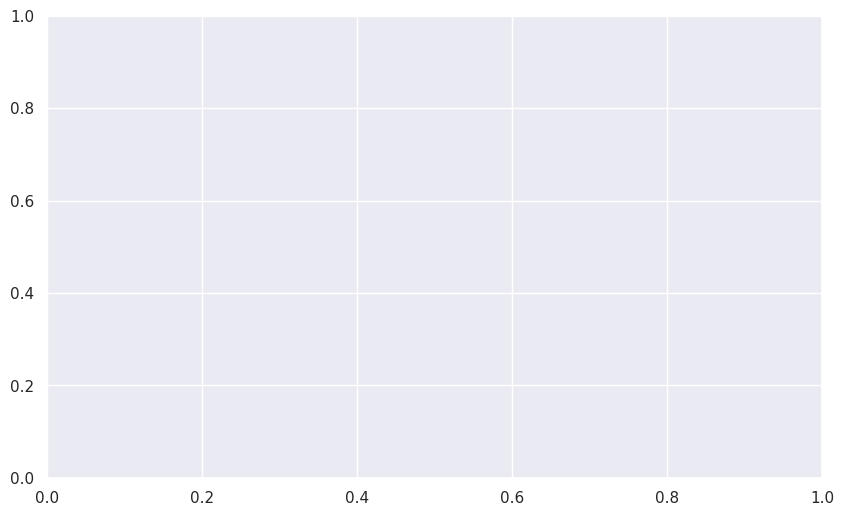

In [133]:
plt.figure(figsize=(10,6))
plt.plot(x=df_P1,linewidth=3)
plt.xlabel('Asset',fontsize=18)
plt.ylabel('Return',fontsize=18)
plt.legend(['R(e)','Volatilidades','Betas','CAPM','R2'],fontsize=18) 
plt.show

**2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).**

**Los activos seleccionados son:**
1.   American Express ("AXP")
2.   Chevron ("CVX")
3.   Disney ("DIS")
4.   Goldman Sachs ("GS")
5.   Walgreens Boots Alliance ("WBA")   

In [134]:
activos2=activos=["AXP","CVX","DIS","GS","WBA"]
precios_2 = yf.download(activos2, start="2014-12-1", end="2022-12-31", interval='1mo')['Adj Close']
retornos_2 = np.log(precios_2/precios_2.shift()).dropna()
precios_indice2 = yf.download('^DJI',start="2014-12-1", end="2022-12-31", interval = '1mo')['Adj Close']
retornos_indice2 = np.log(precios_indice2/precios_indice2.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [135]:
Cov_2 = retornos_2.cov()
Cov_2 = np.array(Cov_2)
retornos_sharpe2 = np.array(retornos_2.mean())
unos = np.ones(5)
Cov_inv2 = np.linalg.inv(Cov_2)
Vpesos = Cov_inv2*unos

n = len(retornos_sharpe2)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, Cov_2))
restricciones = [x @ retornos_sharpe2 == 1, x @ retornos_sharpe2 >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
PortSharpe_2 = x.value/sum(x.value)
pesos2 = round(pd.DataFrame(PortSharpe_2).T,4)
     

a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:  tomar solo posiciones largas en el portafolio.

Text(0.5, 1.0, 'Plano riesgo retorno del portafolio de sharpe')

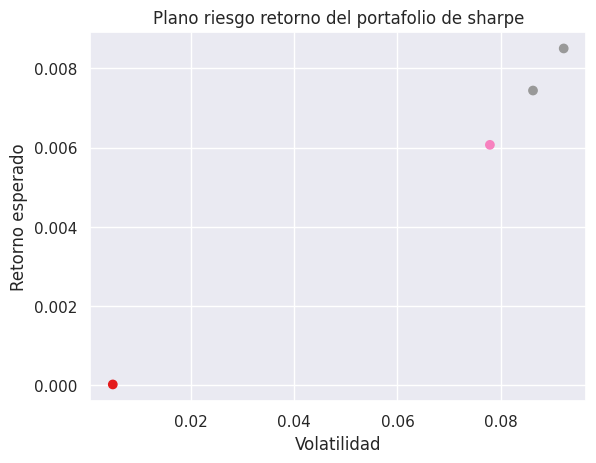

In [136]:
plt.scatter(np.sqrt(retornos_sharpe2), retornos_sharpe2, c=retornos_sharpe2 / np.sqrt(retornos_sharpe2), marker='o', cmap='Set1');
plt.xlabel('Volatilidad')
plt.ylabel('Retorno esperado')
plt.title('Plano riesgo retorno del portafolio de sharpe')
     

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el  modelo estándar o paramétrico. 

In [137]:
# Nivel de confianza 95%
rp = (retornos_sharpe2 @ PortSharpe_2).mean()
sigmap = (retornos_sharpe2 @ PortSharpe_2).std()
alpha2b = 0.05
VaRp2b = rp - norm.ppf(1-alpha2b)*sigmap 
VaRp2b

0.14671314318495077

In [138]:
# Nivel de confianza 99%
alpha2_2b = 0.01
VaRp2_2b = rp - norm.ppf(1-alpha2_2b)*sigmap 
VaRp2_2b

0.14671314318495077

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el  modelo de estimación histórica. 

In [139]:
alpha = 0.05 
Hr2c = retornos_sharpe2[-5:] 
VaRh2 = -np.percentile(Hr2, 5)
VaRh2

0.003974861260482214

In [140]:
alpha = 0.01 
Hr2_2c = retornos_sharpe2[-5:] 
VaRh2_2c = -np.percentile(Hr2_2c, 1)
VaRh2_2c

0.004774524432137348

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000 portafolios. De esta muestra aleatoria obtener el portafolio tangente. Presente  gráficamente los portafolios en el plano riesgo-retorno.  

In [141]:
NS = 10000
pesosMC = np.random.dirichlet(np.ones(len(retornos_2.columns)), NS)
retornosMC = np.dot(retornos_sharpe2, pesosMC.T)
volatilidadesMC = np.sqrt(np.diag(np.dot(np.dot(pesosMC, Cov_2), pesosMC.T)))
alpha = 0.95
VaR_MC = np.percentile(-retornosMC, alpha*100)
#VaR otorgado por Monte Carlo
VaR_MC
     

0.00030919087307592345

**3. Los precios de activos riesgos en el mercado describen un proceso estocástico que satisface:
Donde: 
 es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de tiempo t.**

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022, estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente gráficamente las primeras 20 trayectorias del proceso.

Nota: tome como S0 el precio de Dic-2022 y los parámetros estimados a partir de la muestra de datos.

In [142]:
activos3=activos=["DIS"]
precios_3 = yf.download(activos3, start="2018-12-1", end="2022-12-31", interval='1mo')['Adj Close']
retornos_3 = np.log(precios_3/precios_3.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [59]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0, 0.5, 'Precio')

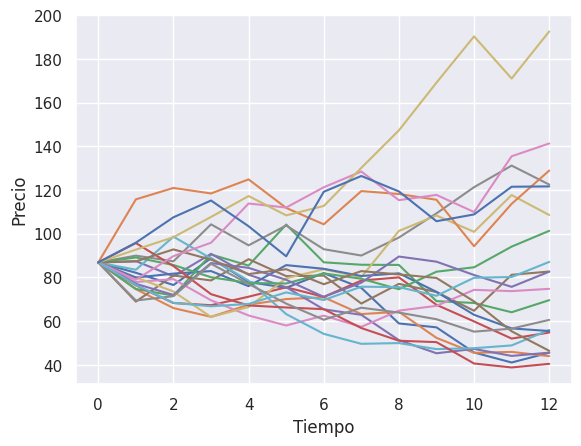

In [143]:
mu = retornos_3.mean()*12
sigma = retornos_3.std()*np.sqrt(12)
T = 1
S0 = precios_3[-1]
NS = 10000
M = 12
St3 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St3[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')

b. Construya el histograma de los precios y retornos al final del periodo (�� = 1). ¿qué puede concluir de la forma de los histogramas? 

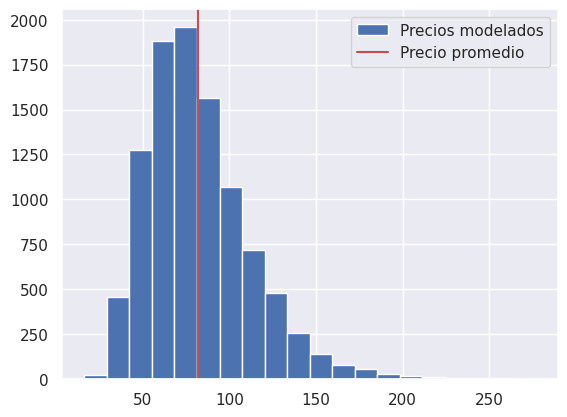

In [144]:
plt.hist(St3[:,-1], bins=20, label='Precios modelados')
plt.axvline(St3[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();
     

Al ver un fuerte sesgo hacia la izquierda, se recomienda realizar una mayor inversión.

c. Demuestre que el valor del precio simulado de la acción en T converge a 

In [145]:
S0 * np.exp(mu * T) 

82.37688561698953

In [146]:
St3[:,-1].mean()  

82.02757349161058

Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan  ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de  estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso ���� que satisface: 
����+���� = ���� + (��–����)���� + ��(����+���� − ����) 



a. Utilice el método de Monte Carlo para realizar una simulación de 100 posibles trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ = 0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.

In [147]:
X0 = 1
def PathsOU(X0,mu,sigma,T,NS,M):
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X0 = X[:,0]
    dt = T / M
    k=1
    std_dt = np.sqrt(sigma*2 / (2*k) * (1-np.exp(-2*k*dt)))
    for t in range(0,M):
         X[:,t+1] = mu + np.exp(-k*dt)*(X[:,t]-mu) + std_dt * Z[:,t]
    return X

Text(0, 0.5, 'Precio')

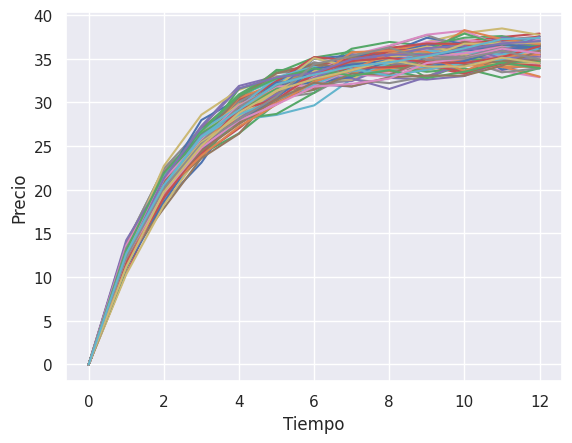

In [148]:
T = 5 
mu = 3*12
sigma = 0.3*np.sqrt(12)
X0 = 1
NS = 100
M = 12
Xt = PathsOU(X0,mu,sigma,T,NS,M)

plt.plot(np.transpose(Xt)) 
plt.xlabel('Tiempo')
plt.ylabel('Precio')

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en  el largo plazo? 

Esto nos concluye que va a tener una tendencia logarítmica positiva a largo plazo.

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso Ornstein-Uhlenbeck?

Text(0.5, 0, 'Tiempo')

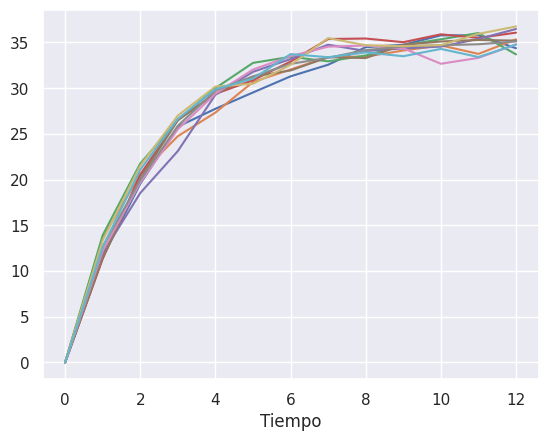

In [149]:
T4C = 5 
mu4C = 3*12
sigma4C = 0.3*np.sqrt(12)
X04C = 1
NS4C = 10
M4C = 12
Xt2 = PathsOU(X04C,mu4C,sigma4C,T4C,NS4C,M4C)

Xt2
plt.plot(np.transpose(Xt2)) 
plt.xlabel("Tiempo")

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el mercado, esta se puede modelar como:

Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T = 1, NS = 100, dt = T/m; simule 100 posibles valores de la tasa de corta en el instante T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con vencimiento en T. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.

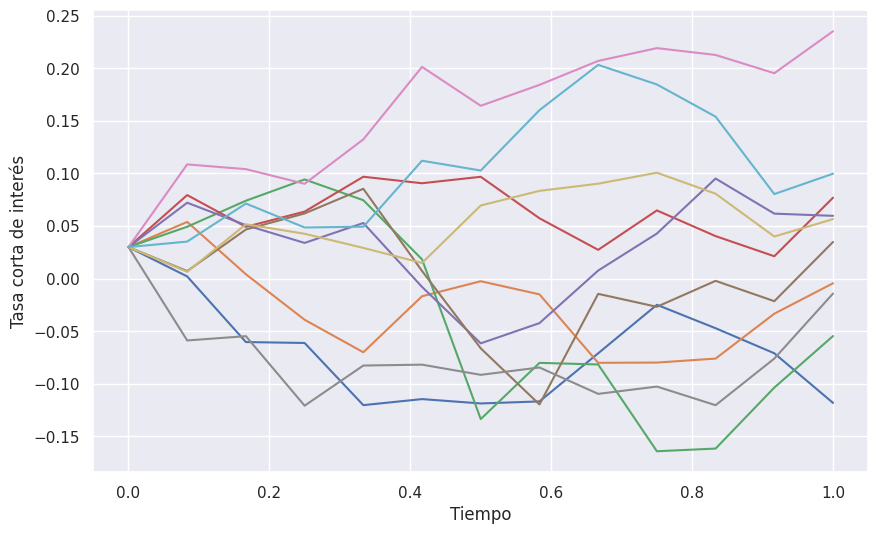

In [150]:

r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
NS = 100
m = 12
dt = T/m

r = np.zeros((NS, m+1))
r[:,0] = r0
for i in range(NS):
    for j in range(m):
        r[i,j+1] = r[i,j] + (mu - r[i,j])*dt + sigma*np.random.normal()*np.sqrt(dt)
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(np.linspace(0,T,m+1), r[i,:], label=f"Trayectoria {i+1}")
plt.xlabel("Tiempo")
plt.ylabel("Tasa corta de interés")
plt.show()

In [151]:
precio4D = np.exp(-r[:, -1]*T)*100
print(f"El precio del bono cero cupón y facial es: {np.mean(precio4D):.4f}")

El precio del bono cero cupón y facial es: 97.1109


**5. Escoja tres de los siguientes activos.
*   i. Gold futures (GC=F)
*   ii. Brent Oil futures (BZ=F)
*   iii. US Treasury Bill (^IRX)
*   iv. EURUSD currency (EURUSD=X)
*   v. GBPUSD currency (GBPUSD=X)
*   vi. Coffee futures (KC=F)
*   vii. Natural gas (NG=F)
*   viii. Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso estocástico tipo MGB o de reversión a la media tipo OU.**

a. La gráfica de las series históricas de los precios

[*********************100%***********************]  3 of 3 completed


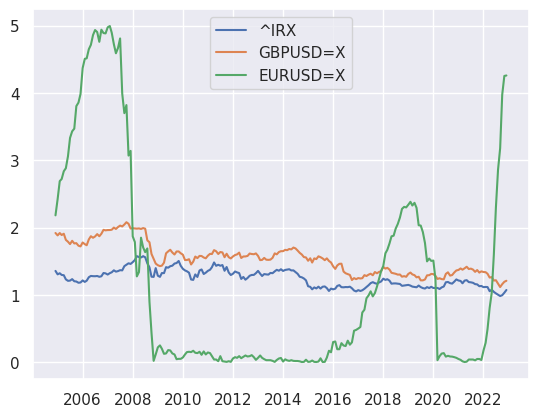

In [173]:
activos5 = ('^IRX', 'GBPUSD=X', 'EURUSD=X')
precios_5 = yf.download(activos5,start="2004-12-1", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos_5 = np.log(precios_5/precios_5.shift()).dropna()
plt.plot(precios_5)
plt.legend(activos5)

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

Text(0, 0.5, 'Precio')

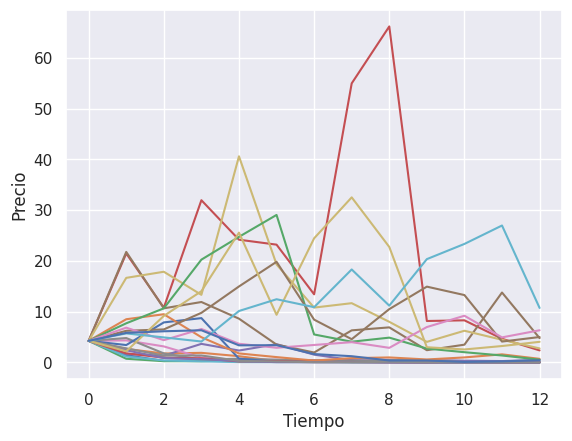

In [175]:
mu = retornos_5['^IRX'].mean()*12
sigma = retornos_5['^IRX'].std()*np.sqrt(12)
T = 1
S0 = precios_5['^IRX'][-1]
NS = 100
M = 12
St5 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St5[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')

Text(0, 0.5, 'Precio')

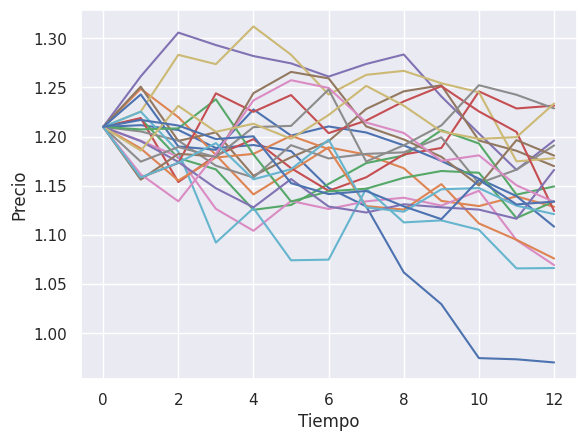

In [176]:

mu = retornos_5['GBPUSD=X'].mean()*12
sigma = retornos_5['GBPUSD=X'].std()*np.sqrt(12)
T = 1
S0 = precios_5['GBPUSD=X'][-1]
NS = 100
M = 12
St52 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St52[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')

Text(0, 0.5, 'Precio')

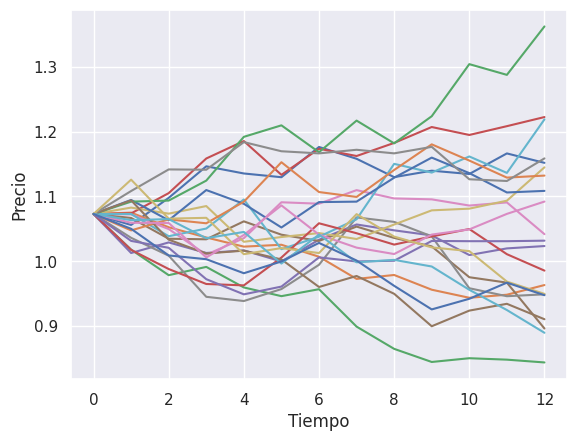

In [177]:

mu = retornos_5['EURUSD=X'].mean()*12
sigma = retornos_5['EURUSD=X'].std()*np.sqrt(12)
T = 1
S0 = precios_5['EURUSD=X'][-1]
NS = 100
M = 12
St53 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St53[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')
     

In [181]:
adf1 = adfuller(precios_5['GBPUSD=X'])  
print("ADF test: %f" % adf1[0])
print("P-value: %f" % adf1[1])
print("Citical values:")
for key, value in adf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.749889
P-value: 0.405609
Citical values:
	1%: -3.461429
	5%: -2.875207
	10%: -2.574054


In [182]:
adf2 = adfuller(precios_5['EURUSD=X'])  
print("ADF test: %f" % adf2[0])
print("P-value: %f" % adf2[1])
print("Citical values:")
for key, value in adf2[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.825029
P-value: 0.368108
Citical values:
	1%: -3.460992
	5%: -2.875016
	10%: -2.573952


In [183]:
adf3 = adfuller(precios_5['^IRX'])  
print("ADF test: %f" % adf1[0])
print("P-value: %f" % adf1[1])
print("Citical values:")
for key, value in adf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.749889
P-value: 0.405609
Citical values:
	1%: -3.461429
	5%: -2.875207
	10%: -2.574054


In [185]:
St5[:,-1].mean()

3.714666088650755

In [187]:
St52[:,-1].mean()

1.1765966854592613

In [188]:
St53[:,-1].mean()

1.0602310231490037